#### Build your own solver of Stochastic Gradient Descent.  Do not use built-in solvers from any deep learning packages. In this problem, you will use stochasticgradient descent 

### Part a)<br>
Write the closed-form expression for the minimizer y*
<br><br>
let's say L = $min_{y}$ $\frac{1}{n}$ $\sum_{i=1}^{n} |y - x_i|^2$
<br><br>
to minimize over y
<br><br>
$$
\begin{aligned}
\frac{\partial L}{\partial y} = 0 \\
\therefore \frac{1}{n} \sum_{i=1}^{n} 2|y - x_i| = 0 \\
\frac{2}{n} \sum_{i=1}^{n} |y - x_i| = 0 \\
\frac{2}{n} (\sum_{i=1}^{n} y - \sum_{i=1}^{n} x_i )= 0 \\
\frac{2}{n} (ny - \sum_{i=1}^{n} x_i )= 0 \\
2y = \frac{2}{n} \sum_{i=1}^{n} x_i\\
y* = \frac{1}{n} \sum_{i=1}^{n} x_i \\
\end{aligned}
$$

### Part b)<br>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

Now we generate a distribution for ${x_i}$ ~ $Uniform[0,1]$ for i=1 ... 100 <br>
We make Y a variable with requires grad = True as we want to minimize y <br>
The function G(X) is defined as equation (1) <br>
The function criterion() finds the MSE between the two inputs given to it <br>

In [2]:
x = torch.rand(100)
y = torch.tensor(1.0, requires_grad=True)

def G(x):
    return (y-x)**2

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

After Initializing all the values let us optimize y with two learning rates 0.0001 and 0.001 for 100 epochs and save the observations to plot later.<br>
We also calculate the loss per each epoch. To calculate the loss we first need to know the $y*$.<br>
<br>
From the derivation above we know that $y*$ is the mean of the distribution of x. As we know that x is a uniform distribution we can calculate its mean and use this as out y actual to find the mean squared error.<br>
Mean of Uniform Distribution = 
$$
\begin{aligned}
\frac{max(x) - min(x)}{2} \\
= \frac{1 - 0}{2} \\
= 0.5
\end{aligned}
$$

In [5]:
y = torch.tensor(1.0, requires_grad=True)
lr = 0.0001
y_values_lr_1 = []
losses_lr_1 = []
y_s = []
for epoch in range(100):
    for val in x:
        yhat = G(val)
        yhat.backward()
        y.data = y.data - lr*y.grad.data
        y.grad.data.zero_()
        y_s.append(y.data)
    losses_lr_1.append(criterion(torch.FloatTensor(y_s),0.5))
    y_s=[]
    y_values_lr_1.append(y.data)

y = torch.tensor(1.0, requires_grad=True)
lr = 0.001
y_values_lr_2 = []
y_s = []
losses_lr_2 = []
for epoch in range(100):
    for val in x:
        yhat = G(val)
        yhat.backward()
        y.data = y.data - lr*y.grad.data
        y.grad.data.zero_()
        y_s.append(y.data)
    losses_lr_2.append(criterion(torch.FloatTensor(y_s),0.5))
    y_s=[]
    y_values_lr_2.append(y.data)

We now use the losses from both the optimizations with the different Learning rates to plot the loss graph.

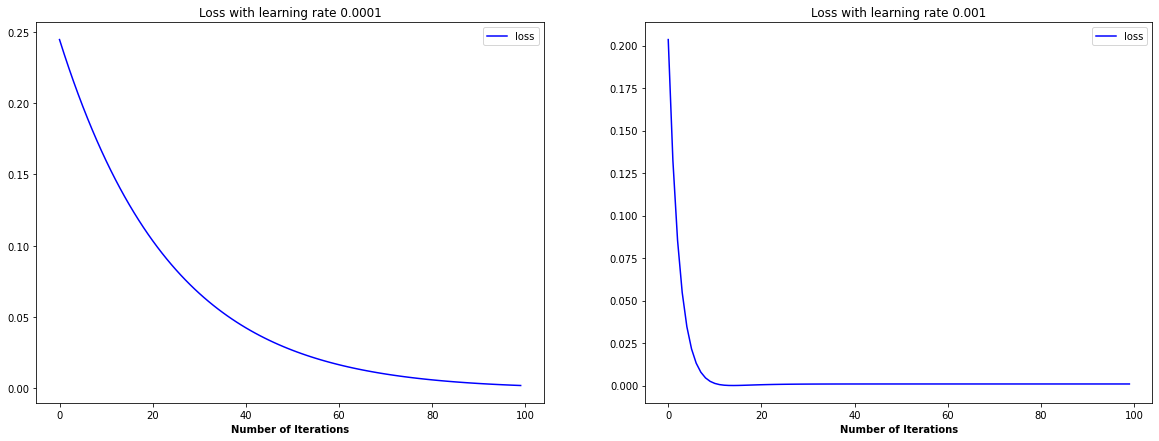

In [6]:
plt.figure(figsize=(20,7))

plt.subplot(1, 2, 1)
plt.title('Loss with learning rate 0.0001')
plt.plot(losses_lr_1, color='blue', label='loss')
plt.legend()
plt.xlabel("Number of Iterations", fontweight='bold')

plt.subplot(1, 2, 2)
plt.title('Loss with learning rate 0.001')
plt.plot(losses_lr_2, color='blue', label='loss')
plt.legend()
plt.xlabel("Number of Iterations", fontweight='bold')

plt.show()

We can see that the graph with a higher learning rate converges way earlier than optimization using a smaller learning rate.